# CESMD Bridge Data Inventory

## From CESMD Records Web Services 

Metadata builder
https://www.strongmotioncenter.org/wserv/records/builder/

JSON URL (CSMIP (CE) Bridge Stations, including inactive stations and grouped by station)
https://www.strongmotioncenter.org/wserv/records/query?netid=CE&sttype=Br&abandoned=true&orderby=epidist-asc&rettype=metadata&format=json&groupby=station&nodata=404

API Documentation
https://www.strongmotioncenter.org/wserv/records/documentation/

![JSON builder](./Figures/CESMD_Records_json_builder.png)

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

## Dataset

In [9]:
with open("CESMDBridges.json", "r") as readfile:
    bridge_metadata = json.load(readfile)
bridge_metadata

{'details': {'status': 200,
  'url': 'https://www.strongmotioncenter.org/wserv/records/query?netid=CE&sttype=Br&abandoned=true&orderby=epidist-asc&rettype=metadata&format=json&groupby=station&nodata=404'},
 'count': 358,
 'results': {'stations': [{'code': '01336',
    'network': 'CE',
    'status': None,
    'channels': 32,
    'recorder_type': None,
    'numRecorders': 8,
    'name': 'El Centro - Hwy8/Meloland Overpass',
    'location': 'ElCentro-MeloBr',
    'longitude': -115.4481,
    'latitude': 32.7735,
    'elevation': '-4',
    'type': 'Bridge',
    'Vs30': 265,
    'siteclass': 'D',
    'events': [{'id': 'ci3352060',
      'cesmd_id': 'ImperialValley79',
      'mag': 6.6,
      'longitude': -115.359,
      'latitude': 32.667,
      'depth': 15,
      'place': 'Imperial Valley, CA',
      'time': '1979-10-15 23:16:00',
      'state': 'CA',
      'country': 'US',
      'detail': '6.6 ML, 16:16:00 PDT, 32.67N 115.36W Depth 15.0 km',
      'net': 'ci',
      'magType': 'Ml',
      

In [10]:
# From the Records, get a cleaned dataframe

records_df = records.copy().loc[records['StaNo']!='StaNo']
records_df.rename(columns = {'Distance (km)':'Distance to Epicenter (km)',
                             'Unnamed: 4':'Distance to Fault (km)',
                             'Horiz\xa0 Apk (g)':'PGA (g)',
                             'Unnamed: 6':'Peak Structure Acceleration (g)',
                             'Unnamed: 11':'DownloadButton'}, inplace = True)
records_df.loc[:,["StaNo", "Station", "Network"]] = records_df.loc[:,["StaNo", "Station", "Network"]].fillna(method='ffill')
print("\n The event records stored in records_df has", records_df.shape[0], "records and",
      records_df.shape[1], "descriptive columns; the first 5 records shown below \n")
records_df.head()


 The event records stored in records_df has 323 records and 12 descriptive columns; the first 5 records shown below 



,StaNo,Station,Network,Distance to Epicenter (km),Distance to Fault (km),PGA (g),Peak Structure Acceleration (g),Earthquake Name,Earthquake Origin Time(UTC),Event ID,View,DownloadButton
1,12649,Beaumont - I10/60 Interchange Bridge,CGS,146.3,139.4,0.04,0.09,Northridge,1994-01-17 12:30:55,ci3144585,NaN,- -
2,12649,Beaumont - I10/60 Interchange Bridge,CGS,13.9,NaN,0.074,0.149,Yucaipa,2005-06-16 20:53:25,ci14155260,NaN,FALSE
3,12649,Beaumont - I10/60 Interchange Bridge,CGS,241.8,189.8,0.028,0.063,Calexico,2010-04-04 22:40:42,ci14607652,NaN,FALSE
4,12666,North Palm Springs - I10/Hwy 62 Bridge,CGS,82.1,NaN,NaN,NaN,HectorMine99,1999-10-16 9:46:45,ci9108645,NaN,FALSE
5,12666,North Palm Springs - I10/Hwy 62 Bridge,CGS,181.4,173.9,0.02,0.11,Northridge,1994-01-17 12:30:55,ci3144585,NaN,- -


In [11]:
# Create a dataframe grouped by each bridge from the records

brgRecords = records_df.copy().loc[:,['StaNo','Station','Network','Event ID']].groupby(['StaNo','Station','Network']).count().reset_index()
brgRecords.rename(columns = {'Event ID':'# of Events'}, inplace = True)
brgRecords.sort_values("# of Events", ascending=False, inplace=True)
print("\n The station data stored in brgRecords has", brgRecords.shape[0], "stations and", brgRecords.shape[1], "descriptive columns; the first 5 stations (sorted by # of Events) shown below \n")
brgRecords.head(10)


 The station data stored in brgRecords has 82 stations and 4 descriptive columns; the first 5 stations (sorted by # of Events) shown below 



,StaNo,Station,Network,# of Events
79,89973,Rio Dell - Hwy 101/Eel River Bridge,CGS,31
74,89324,Rio Dell - Hwy 101/Painter St. Overpass,CGS,20
2,1336,El Centro - Hwy8/Meloland Overpass,CGS,14
75,89686,Eureka - Samoa Channel Bridge,CGS,13
30,47315,San Juan Bautista - Hwy 101/156 Overpass,CGS,10
77,89735,Eureka - Middle Channel Bridge,CGS,10
78,89736,Eureka - Eureka Channel Bridge,CGS,10
9,23631,San Bernardino - I10/215 Interchange Br,CGS,9
52,58700,San Francisco - Golden Gate Bridge,CGS,8
46,58632,San Francisco - Bay Bridge/West,CGS,7


In [12]:
# Merge the records with the metadata.

raw_data = brg_df.merge(brgRecords, how='left', left_on="StationID", right_on='StaNo')
raw_data.sort_values("# of Events", ascending=False, inplace=True)
print("\n The station data stored in raw_data has", raw_data.shape[0], "stations and", raw_data.shape[1], "descriptive columns; the first 5 stations (sorted by # of Events) shown below \n")
raw_data.head()


 The station data stored in raw_data has 82 stations and 30 descriptive columns; the first 5 stations (sorted by # of Events) shown below 



,StationID,network,status,# of Sensors,recorder_type,numRecorders,comm_code,crl_orientation,name,location,...,bldtype,bldheight,stationpage,type_y,coordinates,id,StaNo,Station,Network,# of Events
80,89973,CE,Active,18,M,1.0,Cpm,None,Rio Dell - Hwy 101/Eel River Bridge,RioDel-EelRvrBr,...,None,None,https://strongmotioncenter.org/cgi-bin/CESMD/s...,Point,"[-124.1196, 40.5093]",CE89973,89973,Rio Dell - Hwy 101/Eel River Bridge,CGS,31.0
18,89324,CE,Active,17,V,1.0,Cpm,None,Rio Dell - Hwy 101/Painter St. Overpass,RioDel-PaintStBr,...,None,None,https://strongmotioncenter.org/cgi-bin/CESMD/s...,Point,"[-124.1009, 40.5031]",CE89324,89324,Rio Dell - Hwy 101/Painter St. Overpass,CGS,20.0
77,89686,CE,Active,33,M,2.0,Cpm,None,Eureka - Samoa Channel Bridge,Eureka-SamChnBr,...,None,None,https://strongmotioncenter.org/cgi-bin/CESMD/s...,Point,"[-124.1697, 40.8216]",CE89686,89686,Eureka - Samoa Channel Bridge,CGS,13.0
79,89736,CE,Active,27,M,2.0,Cpm,None,Eureka - Eureka Channel Bridge,Eureka-ErkaChnBr,...,None,None,https://strongmotioncenter.org/cgi-bin/CESMD/s...,Point,"[-124.1547, 40.809]",CE89736,89736,Eureka - Eureka Channel Bridge,CGS,10.0
78,89735,CE,Active,17,M,1.0,Cpm,None,Eureka - Middle Channel Bridge,Eureka-MidChnBr,...,None,None,https://strongmotioncenter.org/cgi-bin/CESMD/s...,Point,"[-124.1594, 40.8136]",CE89735,89735,Eureka - Middle Channel Bridge,CGS,10.0


In [13]:
# Look at stations which are missing in Record Set but are in Metadata
missingRecords = raw_data.loc[raw_data["StaNo"].isnull()].loc[:,'StationID']
print('There are', missingRecords.shape[0], 'stations which are missing in Record Set but are in Metadata')
missingRecords_df = pd.DataFrame(list(missingRecords.values), columns=["StationID"])
missingRecords_df.to_csv(folder+'data/missingBridgeRecords_df.csv', index=False)
brgRecords[brgRecords['StaNo'].isin(missingRecords.values)]

There are 3 stations which are missing in Record Set but are in Metadata


,StaNo,Station,Network,# of Events


In [14]:
# Look at stations which are missing in Metadata but are in Record Set
raw_data2 = brg_df.merge(brgRecords, how='right', left_on="StationID", right_on='StaNo')
missingMetaData = raw_data2.loc[raw_data2["StationID"].isnull()].loc[:,'StaNo']
print('There are', missingMetaData.shape[0], 'stations which are missing in Metadata but are in Record Set')
missingMetaData_df = pd.DataFrame(list(missingMetaData.values), columns=["StationID"])
missingMetaData_df.to_csv(folder+'data/missingBridgeMetaData_df.csv', index=False)
brgRecords[brgRecords['StaNo'].isin(missingMetaData.values)]

There are 3 stations which are missing in Metadata but are in Record Set


,StaNo,Station,Network,# of Events
2,1336,El Centro - Hwy8/Meloland Overpass,CGS,14
16,24714,San Fernando - I210/Hwy 118 Bridge,CGS,3
33,47729,Big Sur - Hwy 1/Pfeiffer Canyon Bridge [demol],CGS,2


In [15]:
# Sanity Check for Station IDs
# display(brgProperties_df[brgProperties_df['code']=='03679'])
# display(raw_data[raw_data['StationID'] == '3679'])
# display(records_df[records_df['StaNo']=='3679'])

## Visualize Data

findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans.


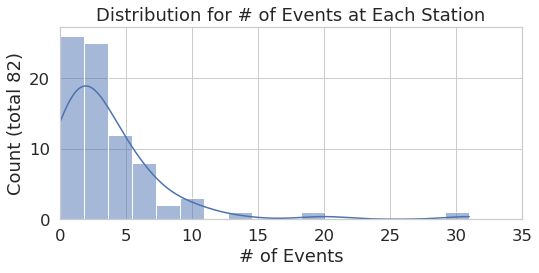

In [16]:
# Distribution for # of Events at Each Station
plt.rc('font', family='Liberation Sans')
# plt.rc('font', family='TH Sarabun New')
plt.rcParams['font.size'] = 30
fig, ax = plt.subplots(figsize = (8,4))
plt.tight_layout()
sns.histplot(raw_data['# of Events'], kde=True)
# ax.yaxis.set_ticks(np.arange(0, 0.26, 0.05))
plt.xlim(0,35)
plt.ylabel(f'Count (total {raw_data.shape[0]})')
plt.title('Distribution for # of Events at Each Station');

In [17]:
# Stations with the most events
simpleDescriptionEvents = raw_data.loc[:,['StationID', 'name', 'Network', 'coordinates', '# of Events', '# of Sensors']]
simpleDescriptionEvents.head(25)

,StationID,name,Network,coordinates,# of Events,# of Sensors
80,89973,Rio Dell - Hwy 101/Eel River Bridge,CGS,"[-124.1196, 40.5093]",31.0,18
18,89324,Rio Dell - Hwy 101/Painter St. Overpass,CGS,"[-124.1009, 40.5031]",20.0,17
77,89686,Eureka - Samoa Channel Bridge,CGS,"[-124.1697, 40.8216]",13.0,33
79,89736,Eureka - Eureka Channel Bridge,CGS,"[-124.1547, 40.809]",10.0,27
78,89735,Eureka - Middle Channel Bridge,CGS,"[-124.1594, 40.8136]",10.0,17
7,47315,San Juan Bautista - Hwy 101/156 Overpass,CGS,"[-121.5796, 36.8619]",10.0,15
3,23631,San Bernardino - I10/215 Interchange Br,CGS,"[-117.2962, 34.065]",9.0,36
50,58700,San Francisco - Golden Gate Bridge,CGS,"[-122.4788, 37.8198]",8.0,124
33,14406,Los Angeles - Vincent Thomas Bridge,CGS,"[-118.2715, 33.7494]",7.0,26
48,58632,San Francisco - Bay Bridge/West,CGS,"[-122.3774, 37.7982]",7.0,79


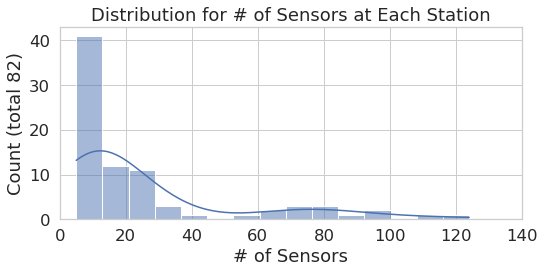

In [18]:
# Distribution for # of Sensors at Each Station
plt.rc('font', family='Liberation Sans')
plt.rcParams['font.size'] = 30
fig, ax = plt.subplots(figsize = (8,4))
plt.tight_layout()
sns.histplot(raw_data['# of Sensors'], kde=True)
# ax.yaxis.set_ticks(np.arange(0, 0.26, 0.05))
plt.xlim(0,140)
plt.ylabel(f'Count (total {raw_data.shape[0]})')
plt.title('Distribution for # of Sensors at Each Station');

In [19]:
# Stations with the most sensors
simpleDescriptionSensors = raw_data.sort_values('# of Sensors', ascending=False).loc[:,['StationID', 'name', 'Network', 'coordinates', '# of Events', '# of Sensors']]
simpleDescriptionSensors.head(20)

,StationID,name,Network,coordinates,# of Events,# of Sensors
50,58700,San Francisco - Golden Gate Bridge,CGS,"[-122.4788, 37.8198]",8.0,124
46,58596,San Francisco Bay - Dumbarton Bridge,CGS,"[-122.12, 37.505]",2.0,109
55,68185,Vallejo - Carquinez/I80 West Bridge,CGS,"[-122.2265, 38.061]",4.0,97
56,68322,Benicia - Martinez/I680 East Bridge,CGS,"[-122.1229, 38.0441]",2.0,95
43,58258,Richmond - San Rafael Bridge,CGS,"[-122.4346, 37.9344]",2.0,85
12,58600,Oakland - SF Bay Bridge/East: SAS,CGS,"[-122.3589, 37.8152]",3.0,83
72,68682,Benicia - Martinez/I680 West Bridge,CGS,"[-122.1238, 38.0414]",3.0,81
48,58632,San Francisco - Bay Bridge/West,CGS,"[-122.3774, 37.7982]",7.0,79
47,58601,Oakland - SF Bay Bridge/East: Skyway,CGS,"[-122.3429, 37.8198]",6.0,73
53,67771,Antioch - San Joaquin River Bridge,CGS,"[-121.7514, 38.0278]",3.0,73


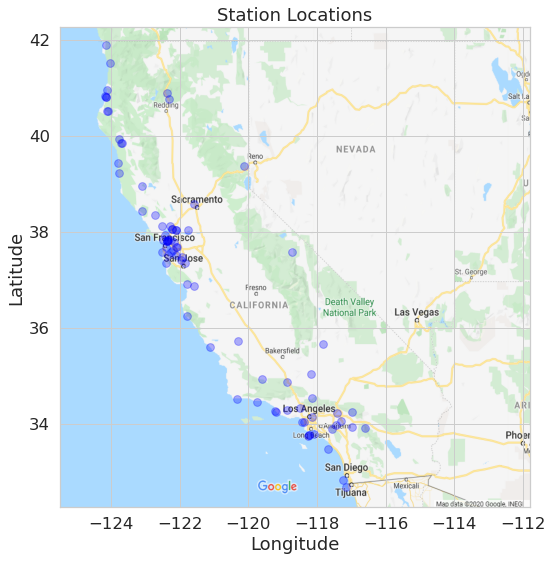

In [20]:
# Make a map of the bridge locations

# Get the locations of each bridge station
brgLoc = simpleDescriptionEvents.coordinates.apply(pd.Series)
brgLoc.columns = ['Longitude', 'Latitude']
brgLoc["StationID"] = simpleDescriptionEvents.StationID

# Number of stations at each geographical location
# brg_geo = brgLoc.groupby(['Longitude', 'Latitude']).count().reset_index()\
#               .sort_values("StationID", ascending = False)\
#               .rename(columns = {'StationID':'# of Stations'})

# Map Boundaries
# map_bound = ((-178.8, -64.5, 17.7, 71.8)) # US map boundaries
map_bound = (-125.5, -111.8, 32.26, 42.27) # CA map boundaries

# Read in the base map and setting up subplot
basemap = plt.imread(folder+'images/CA.png')
plt.rc('font', family='Liberation Sans')
plt.rcParams['font.size'] = 30
fig, ax = plt.subplots(figsize = (10,8))
plt.tight_layout()
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])

# Plot the building locations
brg_plot = plt.scatter(brgLoc['Longitude'], brgLoc['Latitude'], c='blue', alpha=0.3, s=60)
# hexbin_plot = plt.hexbin(brg_geo['Longitude'], brg_geo['Latitude'],
#                          brg_geo['# of Stations'], gridsize=80) # Density plot, if desired
# cb = plt.colorbar(hexbin_plot, fraction=0.03, pad=0.01) # Colorbar for density plot
# cb.set_label('# of Stations')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Station Locations');

# Setting aspect ratio and plotting the hexbins on top of the base map layer
ax.imshow(basemap, zorder=0, extent=map_bound, aspect=1.4);

In [21]:
import numpy as np
print(np.array(list(simpleDescriptionEvents.coordinates)))

[[-124.1196    40.5093 ]
 [-124.1009    40.5031 ]
 [-124.1697    40.8216 ]
 [-124.1547    40.809  ]
 [-124.1594    40.8136 ]
 [-121.5796    36.8619 ]
 [-117.2962    34.065  ]
 [-122.4788    37.8198 ]
 [-118.2715    33.7494 ]
 [-122.3774    37.7982 ]
 [-119.735     34.4497 ]
 [-118.8836    34.8663 ]
 [-117.8187    35.6696 ]
 [-118.1301    34.5463 ]
 [-122.2666    37.8286 ]
 [-122.3429    37.8198 ]
 [-121.9302    37.4639 ]
 [-118.3762    34.0368 ]
 [-118.1561    34.1486 ]
 [-122.2801    38.1205 ]
 [-117.5497    33.882  ]
 [-117.6674    33.4659 ]
 [-118.739     37.5733 ]
 [-122.0993    37.6907 ]
 [-122.397     37.3574 ]
 [-120.1151    39.368  ]
 [-122.2265    38.061  ]
 [-122.713     38.3484 ]
 [-122.5054    38.1157 ]
 [-123.7634    39.9213 ]
 [-121.7514    38.0278 ]
 [-121.9738    37.4176 ]
 [-122.3589    37.8152 ]
 [-122.3627    37.8126 ]
 [-122.1238    38.0414 ]
 [-124.1161    40.9563 ]
 [-116.9907    33.9332 ]
 [-116.6085    33.9153 ]
 [-122.2252    38.061  ]
 [-123.7019    39.8485 ]


In [22]:
# Check minimum and maximum coordinates for bridges in Building Metadata
brgLocAllMetadata = brg_df.coordinates.apply(pd.Series)
brgLocAllMetadata.columns = ['Longitude', 'Latitude']
brgLocAllMetadata["StationID"] = brg_df.StationID
print("Coordinate min and max for buildings with metadata:",
      [brgLocAllMetadata["Longitude"].min(), 
       brgLocAllMetadata["Longitude"].max(), 
       brgLocAllMetadata["Latitude"].min(), 
       brgLocAllMetadata["Latitude"].max()])

Coordinate min and max for buildings with metadata: [-124.1697, -116.6085, 32.6891, 41.8797]


In [23]:
# Find bridges that are nearby the Jack Tone Road Overcrossing Bridge
JTROClat = 37.752903
JTROClong = -121.142249
closeBrgLoc = brgLocAllMetadata[(brgLocAllMetadata['Longitude'].between(JTROClong-0.75, JTROClong+0.75)) & (brgLocAllMetadata['Latitude'].between(JTROClat-0.75, JTROClat+0.75))]
closeBrg = simpleDescriptionEvents.loc[closeBrgLoc.index]
closeBrg

,StationID,name,Network,coordinates,# of Events,# of Sensors
53,67771,Antioch - San Joaquin River Bridge,CGS,"[-121.7514, 38.0278]",3.0,73
81,1571,San Jose; Interchange 101/280/680,NSMP,"[-121.8514, 37.34105]",1.0,24


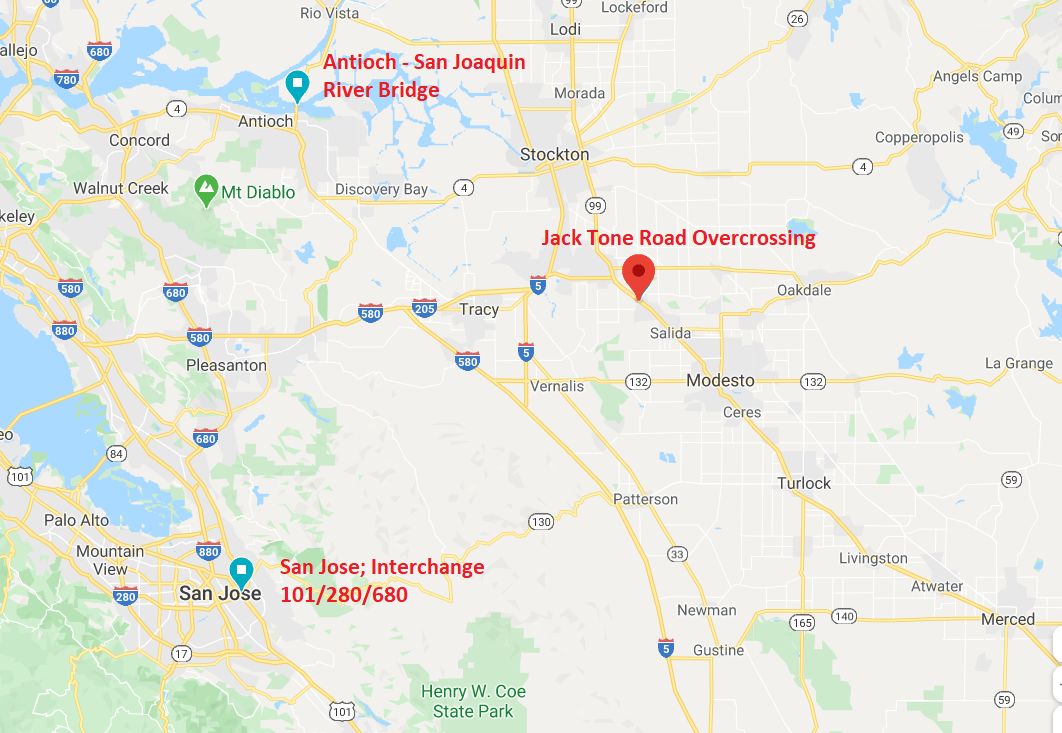

In [24]:
# Map of close bridges
display(Image(folder+'images/NearbyBridges.png', width=600))

## Further Dataset Selection - Identifying Potential Bridges of Interest

Selection Criteria:
1. High Magnitude (minimum recorded magnitude >= M6)
2. High PGA (minimum recorded PGA >= 0.2 g)
3. High PSA (peak structure acceleration) (minimum recorded PSA >= 0.4 g)
4. Small distance to epicenter (maximum recorded distance <= 30 km)

In [25]:
# Merge Earthquake Metadata to Records Data

recordsAndEvents_df = records_df.merge(EQ_df, how='left', left_on='Event ID', right_on='id')

# Clearly, there is some missing data--check how much
recordsMissingMetadata = recordsAndEvents_df.loc[recordsAndEvents_df['mag'].isnull()]
numMissingEventMetadata = recordsMissingMetadata.shape[0]
print('There are', numMissingEventMetadata, 'out of', records_df.shape[0], 'records which are missing earthquake metadata.')
numRecordEventsMissingEventMD = recordsMissingMetadata.loc[:,['StaNo', 'Event ID']].groupby('Event ID').count().shape[0]
numEvents = records_df.loc[:,['StaNo','Event ID']].groupby('Event ID').count().shape[0]
print('The records which are missing metadata include', numRecordEventsMissingEventMD, 'out of', numEvents, 'total events.') # Not so good...

There are 252 out of 323 records which are missing earthquake metadata.
The records which are missing metadata include 116 out of 146 total events.


In [26]:
# Create a dataframe showing maximum magnitude event recorded by each station

maxMags = recordsAndEvents_df.copy().loc[:,['StaNo','Station','Network','mag']].groupby(['StaNo','Station','Network']).max().reset_index()
maxMags.rename(columns = {'mag':'Maximum Recorded Magnitude Event'}, inplace = True)
maxMags.sort_values("Maximum Recorded Magnitude Event", ascending=False, inplace=True)
maxMags.head(10)

,StaNo,Station,Network,Maximum Recorded Magnitude Event
5,14406,Los Angeles - Vincent Thomas Bridge,CGS,7.1
14,24704,Los Angeles - I10/La Cienega Bridge,CGS,7.1
15,24706,Palmdale - Hwy 14/Barrel Springs Bridge,CGS,7.1
18,24775,Grapevine - I5/Lebec Rd Bridge,CGS,7.1
19,25324,Oxnard - Hwy 101/Santa Clara Rvr Bridge,CGS,7.1
21,25749,Santa Barbara - San Roque Canyon Bridge,CGS,7.1
24,33742,Ridgecrest - Hwy 395/Brown Road Bridge,CGS,7.1
2,1336,El Centro - Hwy8/Meloland Overpass,CGS,6.6
74,89324,Rio Dell - Hwy 101/Painter St. Overpass,CGS,6.5
59,68185,Vallejo - Carquinez/I80 West Bridge,CGS,6.5


In [27]:
# Create a dataframe showing maximum PGA recorded by each station

PGAs = recordsAndEvents_df.copy().loc[:,['StaNo','Station','Network']]
PGAs['PGA (g)'] = recordsAndEvents_df.loc[:,'PGA (g)'].astype(float)
maxPGAs = PGAs.groupby(['StaNo','Station','Network']).max().reset_index()
maxPGAs.rename(columns = {'PGA (g)':'Maximum Recorded PGA (g)'}, inplace = True)
maxPGAs.sort_values("Maximum Recorded PGA (g)", ascending=False, inplace=True)
maxPGAs.head(10)

,StaNo,Station,Network,Maximum Recorded PGA (g)
42,58596,San Francisco Bay - Dumbarton Bridge,CGS,0.610
74,89324,Rio Dell - Hwy 101/Painter St. Overpass,CGS,0.556
79,89973,Rio Dell - Hwy 101/Eel River Bridge,CGS,0.333
2,1336,El Centro - Hwy8/Meloland Overpass,CGS,0.318
77,89735,Eureka - Middle Channel Bridge,CGS,0.278
78,89736,Eureka - Eureka Channel Bridge,CGS,0.256
5,14406,Los Angeles - Vincent Thomas Bridge,CGS,0.250
24,33742,Ridgecrest - Hwy 395/Brown Road Bridge,CGS,0.243
30,47315,San Juan Bautista - Hwy 101/156 Overpass,CGS,0.240
66,76741,Truckee - I80/Truckee River Bridge,CGS,0.189


In [28]:
# Create a dataframe showing maximum PSA recorded by each station

PSAs = recordsAndEvents_df.copy().loc[:,['StaNo','Station','Network']]
PSAs['PSA (g)'] = recordsAndEvents_df.loc[:,'Peak Structure Acceleration (g)'].astype(float)
maxPSAs = PSAs.groupby(['StaNo','Station','Network']).max().reset_index()
maxPSAs.rename(columns = {'PSA (g)':'Maximum Recorded PSA (g)'}, inplace = True)
maxPSAs.sort_values("Maximum Recorded PSA (g)", ascending=False, inplace=True)
maxPSAs.head(10)

,StaNo,Station,Network,Maximum Recorded PSA (g)
11,24670,Los Angeles - I10/405 Interchange Bridge,CGS,1.790
74,89324,Rio Dell - Hwy 101/Painter St. Overpass,CGS,1.338
58,68184,Vallejo - Carquinez/I80 East Bridge,CGS,1.085
26,36668,Parkfield - Hwy 46/Cholame Creek Bridge,CGS,1.047
9,23631,San Bernardino - I10/215 Interchange Br,CGS,1.020
30,47315,San Juan Bautista - Hwy 101/156 Overpass,CGS,0.940
59,68185,Vallejo - Carquinez/I80 West Bridge,CGS,0.790
57,68065,Vallejo - Hwy 37/Napa River Bridge,CGS,0.657
5,14406,Los Angeles - Vincent Thomas Bridge,CGS,0.650
77,89735,Eureka - Middle Channel Bridge,CGS,0.638


In [29]:
# Create a dataframe showing minimum distance to epicenter recorded by each station

EpicDists = recordsAndEvents_df.copy().loc[:,['StaNo','Station','Network']]
EpicDists['Distance to Epicenter (km)'] = recordsAndEvents_df.loc[:,'Distance to Epicenter (km)'].astype(float)
minEpicDists = EpicDists.groupby(['StaNo','Station','Network']).min().reset_index()
minEpicDists.rename(columns = {'Distance to Epicenter (km)':'Minimum Recorded Distance to Epicenter (km)'}, inplace = True)
minEpicDists.sort_values("Minimum Recorded Distance to Epicenter (km)", ascending=True, inplace=True)
minEpicDists.head(10)

,StaNo,Station,Network,Minimum Recorded Distance to Epicenter (km)
30,47315,San Juan Bautista - Hwy 101/156 Overpass,CGS,3.5
48,58657,Oakland - Hwy 580/24 Interchange Bridge,CGS,4.2
9,23631,San Bernardino - I10/215 Interchange Br,CGS,4.7
67,79296,Fort Bragg - Hwy 1/Noyo River Bridge,CGS,5.8
57,68065,Vallejo - Hwy 37/Napa River Bridge,CGS,6.2
35,54730,Lake Crowley - Hwy 395 Bridge,CGS,7.3
18,24775,Grapevine - I5/Lebec Rd Bridge,CGS,7.4
66,76741,Truckee - I80/Truckee River Bridge,CGS,7.6
79,89973,Rio Dell - Hwy 101/Eel River Bridge,CGS,8.2
74,89324,Rio Dell - Hwy 101/Painter St. Overpass,CGS,8.6


In [30]:
# Merge the criteria attribute dataframes: Maximum magnitude, Maximum PGA, Maximum PSA, and Minimum distance to epicenter.

brgFilter = maxMags.merge(maxPGAs.loc[:,["StaNo", "Maximum Recorded PGA (g)"]])\
      .merge(maxPSAs.loc[:,["StaNo", "Maximum Recorded PSA (g)"]])\
      .merge(minEpicDists.loc[:,["StaNo", "Minimum Recorded Distance to Epicenter (km)"]])

# Also add in the # of Events, # of Sensors, # of Stories, and station web page
brgFilterAugm = raw_data.sort_values('# of Sensors', ascending=False).loc[:,['StationID', '# of Events', '# of Sensors', 'stationpage']]
brgFilter = brgFilter.merge(brgFilterAugm, how='left', left_on='StaNo', right_on='StationID').drop('StationID', axis=1)

# Export to csv and display first few rows
brgFilter.to_csv(folder+'data/brgFilter.csv', index=False)
brgFilter.head()

,StaNo,Station,Network,Maximum Recorded Magnitude Event,Maximum Recorded PGA (g),Maximum Recorded PSA (g),Minimum Recorded Distance to Epicenter (km),# of Events,# of Sensors,stationpage
0,14406,Los Angeles - Vincent Thomas Bridge,CGS,7.1,0.250,0.650,21.9,7.0,26.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
1,24704,Los Angeles - I10/La Cienega Bridge,CGS,7.1,0.095,0.122,14.9,5.0,15.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
2,24706,Palmdale - Hwy 14/Barrel Springs Bridge,CGS,7.1,0.027,0.092,56.4,6.0,9.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
3,24775,Grapevine - I5/Lebec Rd Bridge,CGS,7.1,0.058,0.041,7.4,6.0,16.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
4,25324,Oxnard - Hwy 101/Santa Clara Rvr Bridge,CGS,7.1,0.032,0.047,66.9,2.0,15.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...


In [31]:
# Filter for certain criteria
minMag = 6;
minPGA = 0.2;
minPSA = 0.4;
maxDist = 30;

bestBrgs = brgFilter.loc[(brgFilter['Maximum Recorded Magnitude Event']>=minMag) & \
                           (brgFilter['Maximum Recorded PGA (g)']>=minPGA) & \
                           (brgFilter['Maximum Recorded PSA (g)']>=minPSA) & \
                           (brgFilter['Minimum Recorded Distance to Epicenter (km)']<=maxDist)]
bestBrgs.to_csv(folder+'data/bestBridges.csv', index=False)
bestBrgs

,StaNo,Station,Network,Maximum Recorded Magnitude Event,Maximum Recorded PGA (g),Maximum Recorded PSA (g),Minimum Recorded Distance to Epicenter (km),# of Events,# of Sensors,stationpage
0,14406,Los Angeles - Vincent Thomas Bridge,CGS,7.1,0.250,0.650,21.9,7.0,26.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
6,33742,Ridgecrest - Hwy 395/Brown Road Bridge,CGS,7.1,0.243,0.604,22.7,6.0,9.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
7,1336,El Centro - Hwy8/Meloland Overpass,CGS,6.6,0.318,0.509,18.5,NaN,NaN,NaN
8,89324,Rio Dell - Hwy 101/Painter St. Overpass,CGS,6.5,0.556,1.338,8.6,20.0,17.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
10,89973,Rio Dell - Hwy 101/Eel River Bridge,CGS,6.5,0.333,0.624,8.2,31.0,18.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...


In [32]:
# Previously Used Bridges

prevBrgList = ['68185', '54730', '1336', '89324', '23631', '76741', '58501', '33742']
prevBrgs = brgFilter[brgFilter['StaNo'].isin(prevBrgList)]
prevBrgs.to_csv(folder+'data/prevBridges.csv', index=False)
prevBrgs

,StaNo,Station,Network,Maximum Recorded Magnitude Event,Maximum Recorded PGA (g),Maximum Recorded PSA (g),Minimum Recorded Distance to Epicenter (km),# of Events,# of Sensors,stationpage
6,33742,Ridgecrest - Hwy 395/Brown Road Bridge,CGS,7.1,0.243,0.604,22.7,6.0,9.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
7,1336,El Centro - Hwy8/Meloland Overpass,CGS,6.6,0.318,0.509,18.5,NaN,NaN,NaN
8,89324,Rio Dell - Hwy 101/Painter St. Overpass,CGS,6.5,0.556,1.338,8.6,20.0,17.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
9,68185,Vallejo - Carquinez/I80 West Bridge,CGS,6.5,0.085,0.790,19.2,4.0,97.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
33,76741,Truckee - I80/Truckee River Bridge,CGS,4.0,0.189,0.273,7.6,4.0,5.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
41,23631,San Bernardino - I10/215 Interchange Br,CGS,NaN,0.180,1.020,4.7,9.0,36.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
59,54730,Lake Crowley - Hwy 395 Bridge,CGS,NaN,0.051,0.075,7.3,5.0,9.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
61,58501,Hayward - BART Elevated Section,CGS,NaN,0.150,0.500,72.7,1.0,15.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...


In [33]:
# Current Bridges of Interest

BrgsOfInterest = closeBrgLoc.StationID.append(bestBrgs.StaNo).append(prevBrgs.StaNo).unique()
BridgeList = brgFilter.loc[brgFilter['StaNo'].isin(BrgsOfInterest)]
BridgeList.to_csv(folder+'data/BridgeList.csv', index=False)
BridgeList

,StaNo,Station,Network,Maximum Recorded Magnitude Event,Maximum Recorded PGA (g),Maximum Recorded PSA (g),Minimum Recorded Distance to Epicenter (km),# of Events,# of Sensors,stationpage
0,14406,Los Angeles - Vincent Thomas Bridge,CGS,7.1,0.250,0.650,21.9,7.0,26.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
6,33742,Ridgecrest - Hwy 395/Brown Road Bridge,CGS,7.1,0.243,0.604,22.7,6.0,9.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
7,1336,El Centro - Hwy8/Meloland Overpass,CGS,6.6,0.318,0.509,18.5,NaN,NaN,NaN
8,89324,Rio Dell - Hwy 101/Painter St. Overpass,CGS,6.5,0.556,1.338,8.6,20.0,17.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
9,68185,Vallejo - Carquinez/I80 West Bridge,CGS,6.5,0.085,0.790,19.2,4.0,97.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
10,89973,Rio Dell - Hwy 101/Eel River Bridge,CGS,6.5,0.333,0.624,8.2,31.0,18.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
17,67771,Antioch - San Joaquin River Bridge,CGS,4.5,0.008,0.234,28.0,3.0,73.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
33,76741,Truckee - I80/Truckee River Bridge,CGS,4.0,0.189,0.273,7.6,4.0,5.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
39,1571,San Jose; Interchange 101/280/680,NSMP,NaN,NaN,NaN,33.7,1.0,24.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
41,23631,San Bernardino - I10/215 Interchange Br,CGS,NaN,0.180,1.020,4.7,9.0,36.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...


In [34]:
brgFilter.loc[brgFilter['StaNo']=='36668']

,StaNo,Station,Network,Maximum Recorded Magnitude Event,Maximum Recorded PGA (g),Maximum Recorded PSA (g),Minimum Recorded Distance to Epicenter (km),# of Events,# of Sensors,stationpage
51,36668,Parkfield - Hwy 46/Cholame Creek Bridge,CGS,NaN,NaN,1.047,11.8,2.0,6.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...


In [35]:
BRACE2bridges = prevBrgList+['36668', '58658']
BRACE2list = brgFilter.loc[brgFilter['StaNo'].isin(BRACE2bridges)]
BRACE2list.to_csv(folder+'data/BRACE2list.csv', index=False)
BRACE2list

,StaNo,Station,Network,Maximum Recorded Magnitude Event,Maximum Recorded PGA (g),Maximum Recorded PSA (g),Minimum Recorded Distance to Epicenter (km),# of Events,# of Sensors,stationpage
6,33742,Ridgecrest - Hwy 395/Brown Road Bridge,CGS,7.1,0.243,0.604,22.7,6.0,9.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
7,1336,El Centro - Hwy8/Meloland Overpass,CGS,6.6,0.318,0.509,18.5,NaN,NaN,NaN
8,89324,Rio Dell - Hwy 101/Painter St. Overpass,CGS,6.5,0.556,1.338,8.6,20.0,17.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
9,68185,Vallejo - Carquinez/I80 West Bridge,CGS,6.5,0.085,0.790,19.2,4.0,97.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
29,58658,Hayward - Hwy 580/238 Interchange Bridge,CGS,4.4,0.039,0.055,21.5,4.0,20.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
33,76741,Truckee - I80/Truckee River Bridge,CGS,4.0,0.189,0.273,7.6,4.0,5.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
41,23631,San Bernardino - I10/215 Interchange Br,CGS,NaN,0.180,1.020,4.7,9.0,36.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
51,36668,Parkfield - Hwy 46/Cholame Creek Bridge,CGS,NaN,NaN,1.047,11.8,2.0,6.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
59,54730,Lake Crowley - Hwy 395 Bridge,CGS,NaN,0.051,0.075,7.3,5.0,9.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...
61,58501,Hayward - BART Elevated Section,CGS,NaN,0.150,0.500,72.7,1.0,15.0,https://strongmotioncenter.org/cgi-bin/CESMD/s...


KeyError: 0

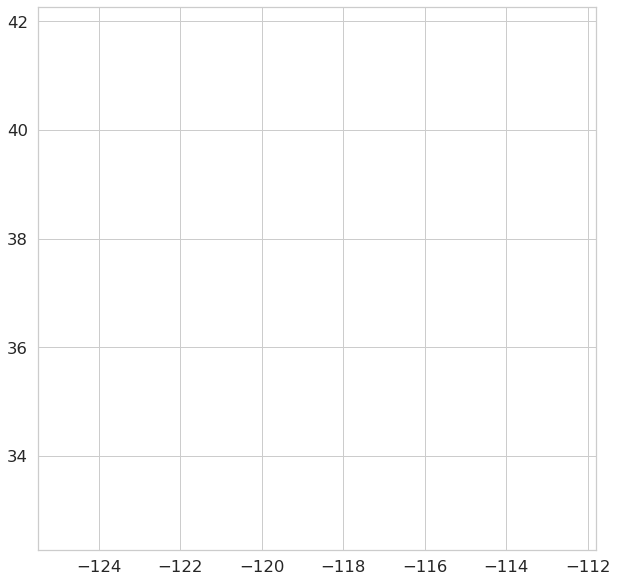

In [36]:
BRACE2listFull = pd.read_excel(folder+'data/BRACE2listAttr.xlsx');
BRACE2bridges = ['68185', '1336', '89324', '36668']
brgLoc = BRACE2listFull[BRACE2listFull["StaNo"].isin(BRACE2bridges)].loc[:, ["Longitude", "Latitude"]]
brgLoc["Longitude"] = -brgLoc["Longitude"].str.replace(' W', '', regex=True).astype(float)
brgLoc["Latitude"] = brgLoc["Latitude"].str.replace(' N', '', regex=True).astype(float)
brgNames = BRACE2listFull[BRACE2listFull["StaNo"].isin(BRACE2bridges)].loc[:, ["Station"]]                                  

# Make a map of the bridge locations

# Map Boundaries
# map_bound = ((-178.8, -64.5, 17.7, 71.8)) # US map boundaries
map_bound = (-125.5, -111.8, 32.26, 42.27) # CA map boundaries

# Read in the base map and setting up subplot
basemap = plt.imread(folder+'images/CA.png')
plt.rc('font', family='Liberation Sans')
plt.rcParams['font.size'] = 30
fig, ax = plt.subplots(figsize = (10,10))
# plt.tight_layout()
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])

# Plot the building locations
brg_plot = plt.scatter(brgLoc['Longitude'], brgLoc['Latitude'], marker="*", c='blue', alpha=0.8, s=200)
x = brgLoc.reset_index()['Longitude']
y = brgLoc.reset_index()['Latitude']
n = brgNames.reset_index()['Station']
for i in range(4):
    ax.annotate(n[i], (x[i]+0.6, y[i]-0.1), size=14, color = "blue")

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Station Locations');

# Setting aspect ratio and plotting the hexbins on top of the base map layer
ax.imshow(basemap, zorder=0, extent=map_bound, aspect=1.4);